# Programming Assignment 1

In Part 1, you have to implement a linear regression model to predict the price of a house based on various input features.

You have to write your code in this jupyter notebook and submit the solved jupyter notebook with the file name \<Roll_No\>_A1_1.ipynb for evaluation. You have to enter your code only in those cells which are marked as ```## CODE REQUIRED ##```, and you have to write your code only between ```### START CODE HERE ###``` and ```### END CODE HERE ###``` comments.

## Part 1: Linear Regression

### Problem Statement  
A real estate company is building a machine learning model to determine the price of a house. The model will take various information regarding a house as input features and predict the price per unit area. They decided to use the linear regression as the machine learning model. Your task is to help the company to build the model.
Given various features of a house, you will create a linear regression model to predict the price of the house.

### Data Description

Dataset Filename: `housing_dataset.csv`

Attributes Information:
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-­retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner­occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-­value property-­tax rate per $10,000

11. PTRATIO: pupil-­teacher ratio by town
12. B: 1000(Bk ­- 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population

Target Variable: MEDV: Median value of owner-­occupied homes in $1000's


These are the following steps or functions that you have to complete to create and train the linear regression model:
1. Reading the data
2. Computing the loss function
3. Computing the gradient of the loss
4. Training the model using Batch Gradient Descent


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
import random

### 1.1. Reading the data

In the following function ```load_data```, you have to read the data from the file and store the data into a pandas dataframe. Then you have to create two numpy arrays $X$ and $y$ from the dataframe:

+ $X$: Input data of the shape (number of samples, number of input features)
+ $y$: Target variable of the shape (number of samples,)


In [4]:
## CODE REQUIRED ##

def load_data(filepath):
    """
    This function loads the data into a pandas dataframe and coverts it into X and y numpy arrays

    Args:
        filepath: File path as a string
    Returns:
        X: Input data of the shape (# of samples, # of input features)
        y: Target variable of the shape (# of sample,)
    """

    ### START CODE HERE ###
    df=pd.read_csv(filepath)
    X=df.drop('MEDV',axis=1).values
    y=df['MEDV'].values

    ### END CODE HERE ###

    return X,y

filepath = None
### START CODE HERE ###
## set the file path
filepath ='content/housing_dataset.csv'
### END CODE HERE ###
X, y = load_data(filepath)

print("Shape of X: ",X.shape, "Shape of y: ",y.shape)

Shape of X:  (404, 13) Shape of y:  (404,)


We need to pre-process the data. We are using min-max scaler to scale the input data ($X$).

After that, we split the data (```X``` and ```y```) into a training dataset (```X_train``` and ```y_train```) and test dataset (```X_test``` and ```y_test```).

In [5]:
## Data scaling and train-test split

def train_test_split(X, y, test_size=0.25, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    split_index = int(X.shape[0] * (1 - test_size))

    train_indices = indices[:split_index]
    test_indices = indices[split_index:]

    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test

def min_max_scaler(X, feature_range=(0, 1)):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)

    X_scaled = (X-X_min)/(X_max-X_min)

    return X_scaled


X = min_max_scaler(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Shape of X_train: ",X_train.shape, "Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape, "Shape of y_test: ",y_test.shape)

Shape of X_train:  (303, 13) Shape of y_train:  (303,)
Shape of X_test:  (101, 13) Shape of y_test:  (101,)


### 1.2. Computing the Loss Function

In linear regression, the model parameters are:

+ $w$: Parameters of the linear regression model (excluding the bias) of the shape (1, number of features)

+ $b$: Bias parameter (scalar) of the linear regression model

Both $w$ and $b$ are numpy arrays.

Given the model parameters $w$ and $b$, the prediction for an input sample $X^i$ is:
$$h_{w,b}(X^i) = w \cdot X^i + b$$
where $X^i$ is the $i^{th}$ training sample with shape (number of features,1)

For linear regression, you have to implement and compute Mean Squarred Error loss fucntion:
$$ L_{w,b}(X) = \sum_{i=1}^{m}(y^i - h_{w,b}(X^i))^2 $$
where $y^i$ is the true target value for the $i^{th}$ sample and $h_{w,b}(X^i)$ is the predicted value for the $i^{th}$ sample using the parameters $w$ and $b$.

$w$ is the list of parameters excluding the bias and $b$ is the bias term.

In [6]:
## CODE REQUIRED ##

def loss_function(X, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
        X: Input data of the shape (# of training samples, # of input features)
        y: Target variable of the shape (# of training sample,)
        w: Parameters of the linear regression model (excluding the bias) of the shape (1, number of features)
        b: Bias parameter (scalar) of the linear regression model

    Returns
        loss: The loss function value of using w and b as the parameters to fit the data points in X and y
    """
    # number of training examples
    m = X.shape[0]

    ### START CODE HERE ###
    w=w.reshape(-1)
    y_pred = np.dot(X,w.T) + b
    loss = np.sum((y_pred - y)**2) / (2 * m)

    ### END CODE HERE ###

    return loss

### 1.3. Comptuing the Gradient of the Loss

In this following function ```compute_gradient```, you have to compute the gradients $\frac{\partial L}{\partial w}$ and $\frac{\partial L}{\partial b}$ of the loss $L$ w.r.t. $w$ and $b$. More specifically, you have to iterate over every training example and compute the gradients of the loss for that training example. Finally, aggregate the gradient values for all the training examples and take the average. The gradients can be computed as:
$$\frac{\partial L}{\partial w} = \frac{1}{m} \sum_{i=1}^m (h_{w,b}(X^i)-y^i)X^i$$

$$\frac{\partial L}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (h_{w,b}(X^i)-y^i)$$


In [7]:
## CODE REQUIRED ##

def compute_gradient(X, y, w, b):
    """
    Computes the gradient values
    Args:
       X: Input data of the shape (# of training samples, # of input features)
       y: Target variable of the shape (# of training sample,)
       w: Parameters of the linear regression model (excluding the bias) of the shape (1, number of features)
       b: Bias parameter of the linear regression model of the shape (1,1) or a scaler
    Returns:
       dL_dw : The gradient of the cost w.r.t. the parameters w with shape same as w
       dL_db : The gradient of the cost w.r.t. the parameter b with shape same as b
    """

    # Number of training examples
    m = X.shape[0]

    dL_dw = None
    dL_db = None

    ### START CODE HERE ###
    dL_dw=0
    dL_db=0
    for i in range(m):
      dL_dw+=(np.dot(w,X[i])+b-y[i])*X[i]
      dL_db+=(np.dot(w,X[i])+b-y[i])
    dL_dw = dL_dw/m
    dL_db = dL_db/m
    ### END CODE HERE ###
    return dL_dw, dL_db

### 1.4. Training the Model using Batch Gradient Descent

Finally, you have to implement the batch gradient descent algorithm to train and learn the parameters of the linear regression model. You have to use ```loss_function``` and ```compute_gradient``` functions that you have implemented earlier in this assignment.

In this ```batch_gradient_descent``` function, you have to compute the gradient for the training samples and update the parameters $w$ and $b$ in every iteration:

+ $w \leftarrow w - \alpha \frac{\partial L}{\partial w}$

+ $b \leftarrow b - \alpha \frac{\partial L}{\partial b}$

Additionally, you have compute the loss function values in every iteration and store it in the list variable ```loss_hist``` and print the loss value after every 100 iterations during the training process.

In [8]:
## CODE REQUIRED ##

def batch_gradient_descent(X, y, w_initial, b_initial, alpha, num_iters):
    """
    Batch gradient descent to learn the parameters (w and b) of the linear regression model and to print loss values
    every 100 iterations

    Args:
        X: Input data of the shape (# of training samples, # of input features)
        y: Target variable of the shape (# of training sample,)
        w_initial: Initial parameters of the linear regression model (excluding the bias) of the shape (1, number of features)
        b_initial: Initial bias parameter (scalar) of the linear regression model
        alpha: Learning rate
        num_iters: number of iterations
    Returns
        w: Updated values of parameters of the model after training
        b: Updated bias of the model after training
        loss_hist: List of loss values for every iteration
    """

    # number of training examples
    m = X.shape[0]

    # to store loss values for every iteation as a list and print loss value after every 100 iterations
    loss_hist = []

    # Initialize parameters
    w = copy.deepcopy(w_initial) ## deepcopy is used so that the updates do not change the initial variable values
    b = b_initial

    ### START CODE HERE ###
    for i in range(0,num_iters):
      dL_dw, dL_db = compute_gradient(X, y, w, b)
      w = w - alpha * dL_dw
      b = b - alpha * dL_db
      loss = loss_function(X, y, w, b)
      loss_hist.append(loss)
      if i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss}")


    ### END CODE HERE ###

    return w, b, loss_hist

Now you have to intialize the model parameters ($w$ and $b$) and learning rate (```alpha```). The learning rate ```alpha``` is to be initialized as 0.001.

In [9]:
## CODE REQUIRED ##

def initialize_parameters():
    """
    This function randomly initializes the model parameters (w and b) and the hyperparameter alpha
    Initial w and b should be randomly sampled from a normal distribution with mean 0
    alpha should be initialized as 0.001
    Args:
        None
    Returns:
        initial_w: Initial parameters of the linear regression model (excluding the bias) of the shape (1, number of features)
        initial_b: Initial bias parameter (scalar) of the linear regression model
        alpha: Learning rate
    """

    initial_w = None
    initial_b = None
    alpha = None

    ### START CODE HERE ###
    initial_b = np.random.randn(1)
    initial_w = np.random.randn(1,X_train.shape[1])
    alpha = 0.001


    ### END CODE HERE ###

    return initial_w,initial_b,alpha


In the next cell, the model is trained using batch gradient descent algorithm for ```num_iters=10000``` iterations. You can change the number of iterations to check any improvements in the performance.

In [10]:
# initialize the parameters and hyperparameter
initial_w, initial_b, alpha = initialize_parameters()

# number of iterations
num_iters = 10000

w,b,loss_hist = batch_gradient_descent(X_train ,y_train, initial_w, initial_b, alpha, num_iters)
print("Updated w: ",w)
print("Updated b: ",b)

Iteration 0: Loss = 286.8930310752566
Iteration 100: Loss = 166.77625586080316
Iteration 200: Loss = 108.73718175795163
Iteration 300: Loss = 80.27867825503492
Iteration 400: Loss = 65.93983297892349
Iteration 500: Loss = 58.363393348505035
Iteration 600: Loss = 54.0468927053014
Iteration 700: Loss = 51.32161840291998
Iteration 800: Loss = 49.39127589332581
Iteration 900: Loss = 47.87470851853197
Iteration 1000: Loss = 46.58837713037076
Iteration 1100: Loss = 45.44288453076876
Iteration 1200: Loss = 44.39374709615226
Iteration 1300: Loss = 43.41797020524487
Iteration 1400: Loss = 42.5028980554882
Iteration 1500: Loss = 41.640902431920466
Iteration 1600: Loss = 40.82684931606987
Iteration 1700: Loss = 40.05688725517835
Iteration 1800: Loss = 39.32786486385736
Iteration 1900: Loss = 38.637047975579954
Iteration 2000: Loss = 37.981979696838195
Iteration 2100: Loss = 37.3604087817558
Iteration 2200: Loss = 36.77025082905922
Iteration 2300: Loss = 36.20956539549327
Iteration 2400: Loss = 35

### 1.5. Final Train Error and Test Error

After the linear regression model is trained, we will compute the final train error and test error for the trained model.

In [11]:
## Train and Test error computation

train_error = loss_function(X_train,y_train,w,b)
test_error = loss_function(X_test,y_test,w,b)
print("Train Error: ",train_error, ", Test Error: ",test_error)

Train Error:  22.095716816137756 , Test Error:  14.629179503557742


### 1.6. Plotting the loss function

We will plot the loss function values for every training iteration. If the model is trained properly, you will see that the loss function reduces as the training progesses and it converges at some point.

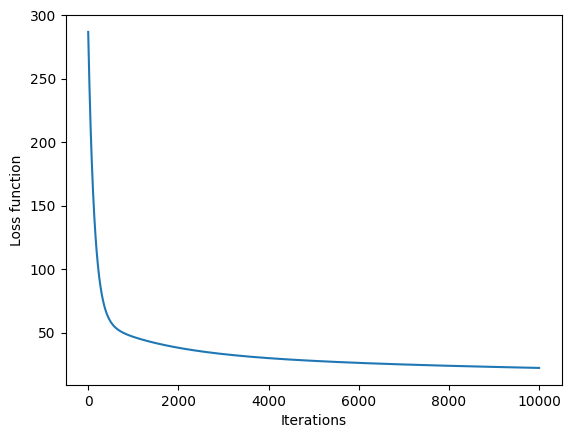

In [12]:
# PLotting the loss values for every training iterations

loss_plot = [loss_hist[i] for i in range(len(loss_hist))]
plt.xlabel("Iterations")
plt.ylabel("Loss function")
plt.plot(loss_plot)
plt.show()

### 1.7. Plotting the histogram of loss

In [13]:
def mse_losses(X, y, w, b):
    y_pred = np.dot(X, w.T) + b
    losses = (y_pred - y)**2
    return losses

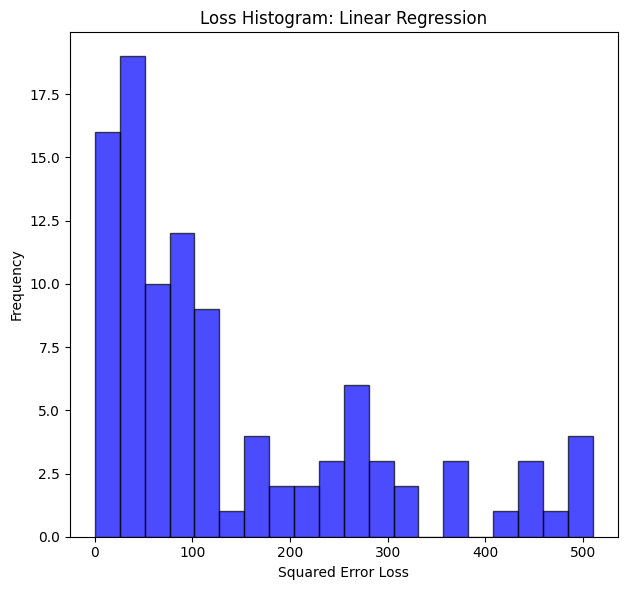

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Compute squared error loss for linear regression
loss_linear = mse_losses(X_test,y_test,w,b)

# Plot histograms
plt.figure(figsize=(12, 6))

# Linear regression loss histogram
plt.subplot(1, 2, 1)
plt.hist(loss_linear[0], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Loss Histogram: Linear Regression')
plt.xlabel('Squared Error Loss')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()


### 1.8 Experimenting with different values of the Hyperparemeters

Previously, we have took the learning rate as 0.001. Now, you have to train the model again by taking learning rate as-


1.   0.01
2.   0.001


After the model is trained, you have to compare the performance of the model with these chosen hyperparameters.

Iteration 0: Loss = 317.5855196315427
Iteration 100: Loss = 75.06389362387131
Iteration 200: Loss = 53.37697975548148
Iteration 300: Loss = 48.58037466749049
Iteration 400: Loss = 45.633009390611385
Iteration 500: Loss = 43.31494957038086
Iteration 600: Loss = 41.4396462284822
Iteration 700: Loss = 39.91547633756785
Iteration 800: Loss = 38.67331312881181
Iteration 900: Loss = 37.658110321493695
Iteration 1000: Loss = 36.8257905186691
Iteration 1100: Loss = 36.1410242399023
Iteration 1200: Loss = 35.575475674336964
Iteration 1300: Loss = 35.1064030707656
Iteration 1400: Loss = 34.71554085794155
Iteration 1500: Loss = 34.38820653761686
Iteration 1600: Loss = 34.11258699683715
Iteration 1700: Loss = 33.879168059954225
Iteration 1800: Loss = 33.68027841232848
Iteration 1900: Loss = 33.509724859439316
Iteration 2000: Loss = 33.36250053712446
Iteration 2100: Loss = 33.234551399803756
Iteration 2200: Loss = 33.12258927427151
Iteration 2300: Loss = 33.02394212885051
Iteration 2400: Loss = 32.

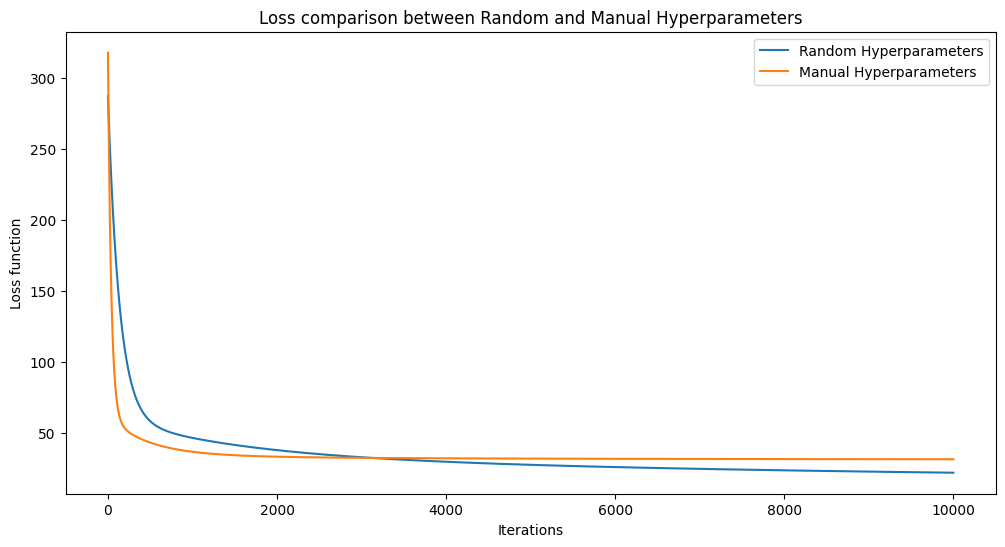

In [15]:
## CODE REQUIRED ##

"""
Compare the performance with the chosen hyperparameters.
"""

### START CODE HERE ###
manual_r = 5
manual_alpha = 0.01
manual_num_iters = 10000

X_manual = X[:, :manual_r]

manual_initial_w = np.random.randn(1, X_manual.shape[1])
manual_initial_b = np.random.randn(1)

manual_w, manual_b, manual_loss_hist = batch_gradient_descent(
    X_train[:, :manual_r], y_train, manual_initial_w, manual_initial_b, manual_alpha, manual_num_iters
)

manual_train_error = loss_function(X_train[:, :manual_r], y_train, manual_w, manual_b)
manual_test_error = loss_function(X_test[:, :manual_r], y_test, manual_w, manual_b)

print("Manual Setup:")
print("Updated w: ", manual_w)
print("Updated b: ", manual_b)
print("Manual Train Error: ", manual_train_error)
print("Manual Test Error: ", manual_test_error)

print("\nRandom Setup:")
print("Train Error: ", train_error)
print("Test Error: ", test_error)

plt.figure(figsize=(12, 6))
plt.plot([loss_hist[i] for i in range(len(loss_hist))], label='Random Hyperparameters')
plt.plot([manual_loss_hist[i] for i in range(len(manual_loss_hist))], label='Manual Hyperparameters')
plt.xlabel("Iterations")
plt.ylabel("Loss function")
plt.legend()
plt.title("Loss comparison between Random and Manual Hyperparameters")
plt.show()

### END CODE HERE ###

## Task: Submitting Your Predictions

After training your Linear Regression model on the provided training dataset, you have generate predictions for the test dataset named `housing_test.csv`, your final task is to save the predicted values for the test dataset in a file named `RollNo_Linear.csv`.

### Instructions for Submission:
1. **Format**:  
   The `RollNo_Linear.csv` file should contain one prediction per line, corresponding to the order of the test dataset features provided to you. Ensure there are no extra spaces, commas, or blank lines.

2. **File Name**:  
The file must be named `RollNo_Linear.csv` exactly (case-sensitive).



In [16]:
"""
Write the code to save the predictions in required format
"""
### START CODE HERE ###
# Load the test data
test_df = pd.read_csv('content/housing_test.csv')
X_test_data = test_df.values

# Scale the test data using the same scaler as the training data
X_test_scaled = min_max_scaler(X_test_data)  # Assuming this scaler function is defined

# Make predictions
y_pred_test = np.dot(X_test_scaled, w.T) + b

# Convert predictions to a pandas DataFrame
y_pred_df = pd.DataFrame(y_pred_test, columns=["Predictions"])

# Save predictions to a CSV file
y_pred_df.to_csv('22CS30056_Linear.csv', index=False)

print("Predictions saved to '22CS30056_Linear.csv'")

### END CODE HERE ###

Predictions saved to '22CS30056_Linear.csv'
